# Image compression through Singular Value Decomposition


Load a picture as a 3-dimensional `np.array`


In [68]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = [8, 8]

# write here the import path of the image
image_path = "./data/TarantulaNebula.jpg"

A = imread(image_path)
A.shape

(567, 630, 3)

Visualize the picture


(-0.5, 629.5, 566.5, -0.5)

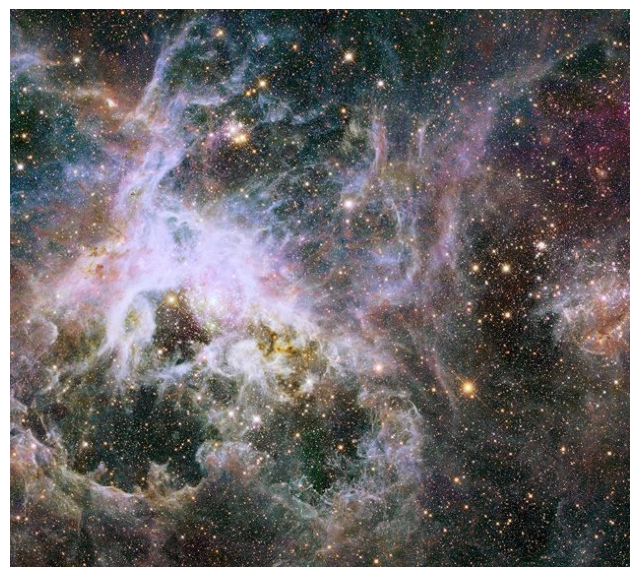

In [69]:
img = plt.imshow(A)
plt.axis("off")

Convert the picture to gray-scale and visualize it.


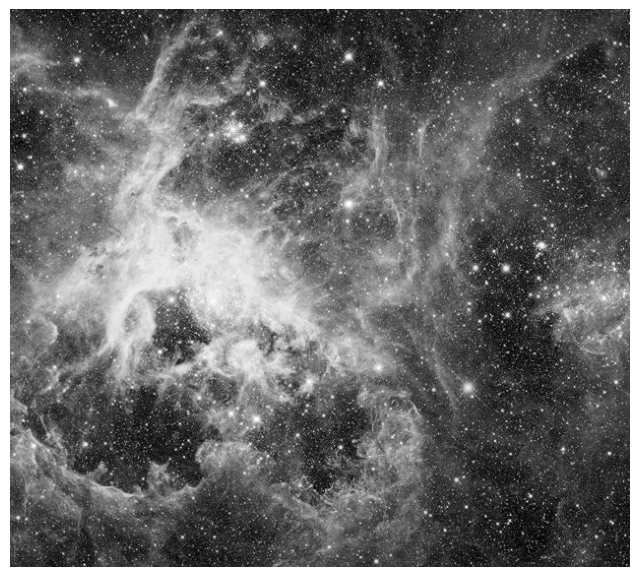

In [70]:
# compute the mean along axis in position 2 (which is the third axis)
X = np.mean(A, axis=2)
img = plt.imshow(X)
plt.axis("off")

# change the color map (just for visualization purposes: the image is already in greyscale after having computed the mean the the values)
img.set_cmap("gray")

What is the picture size?


In [71]:
X.shape

(567, 630)

Perform the SVD


In [72]:
U, s, VT = np.linalg.svd(X, full_matrices=False)
print("U shape: ", U.shape)
print("s shape: ", s.shape)
print("VT shape: ", VT.shape)

U shape:  (567, 567)
s shape:  (567,)
VT shape:  (567, 630)


build matrix S


In [73]:
S = np.diag(s)
S

array([[6.16871699e+04, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 9.11695808e+03, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 7.37395851e+03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.13764454e+01, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.84919421e+01, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.77164177e+01]])

Plot the trend of

- the singular values $\sigma_k$
- the cumulate fraction of singular values: $\frac{\sum_{i=1}^{k} \sigma_i}{\sum_{i=1}^{q} \sigma_i}$
- the fraction of the "explained variance": $\frac{\sum_{i=1}^{k} \sigma_i^2}{\sum_{i=1}^{q} \sigma_i^2}$


plot of the singular values


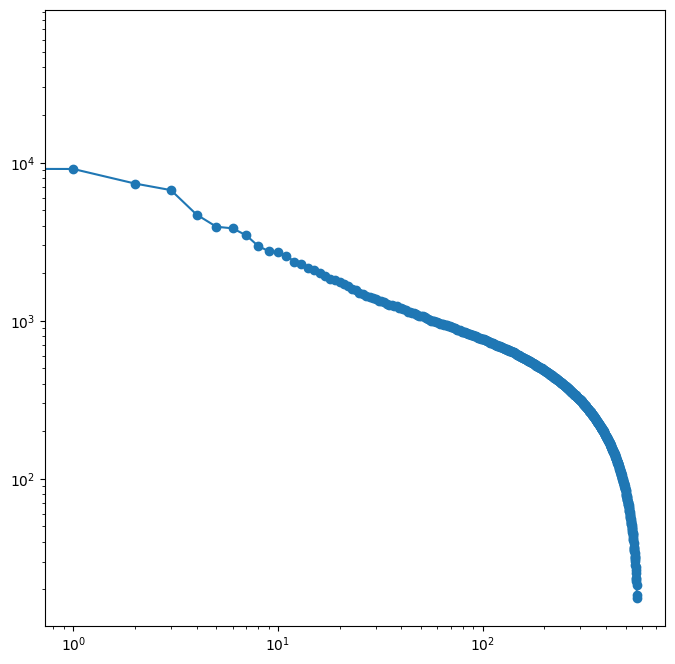

In [74]:
# plot on normal scale axes
# plt.plot(s)

# plot in logaritmic scale on both axes
plt.loglog(s, "o-")

plot the cumulate fraction of singular values


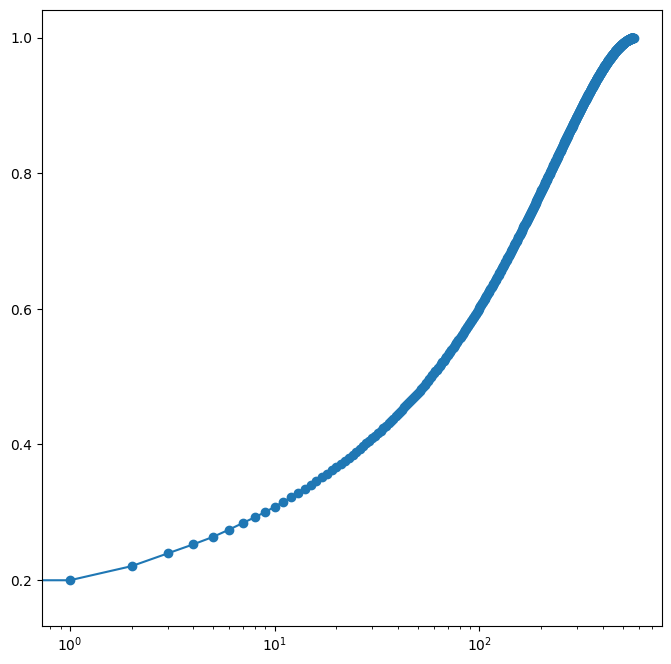

In [75]:
# s_sum = np.sum(s)
# c_sum = np.cumsum(s)

# c_fract = c_sum / sum

# plt.semilogx(c_fract, 'o-')

plt.semilogx(np.cumsum(s) / np.sum(s), "o-")

plot the fraction of "explained variance"


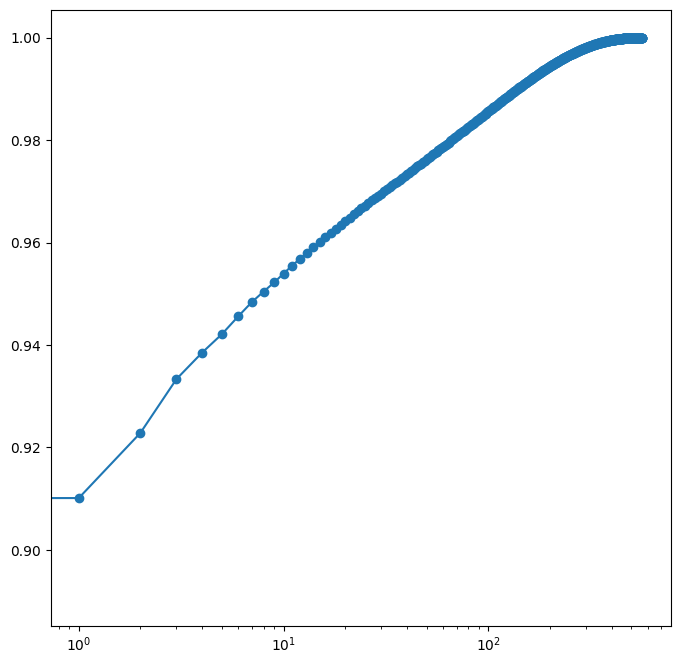

In [76]:
# s_square = np.square(s)
# s_square_sum = np.sum(s_square)
# s_square_c_sum = np.cumsum(s_square)
# s_square_c_fract = s_square_c_sum / s_square_sum

# plt.semilogx(s_square_c_fract, 'o-')

plt.semilogx(np.cumsum(s**2) / np.sum(s**2), "o-")
# plt.plot(np.cumsum(s**2) / np.sum(s**2), "o-")

Visualize the best rank-$k$ matrices, for $k$ = 1, 5, 10, 50, 100, 500


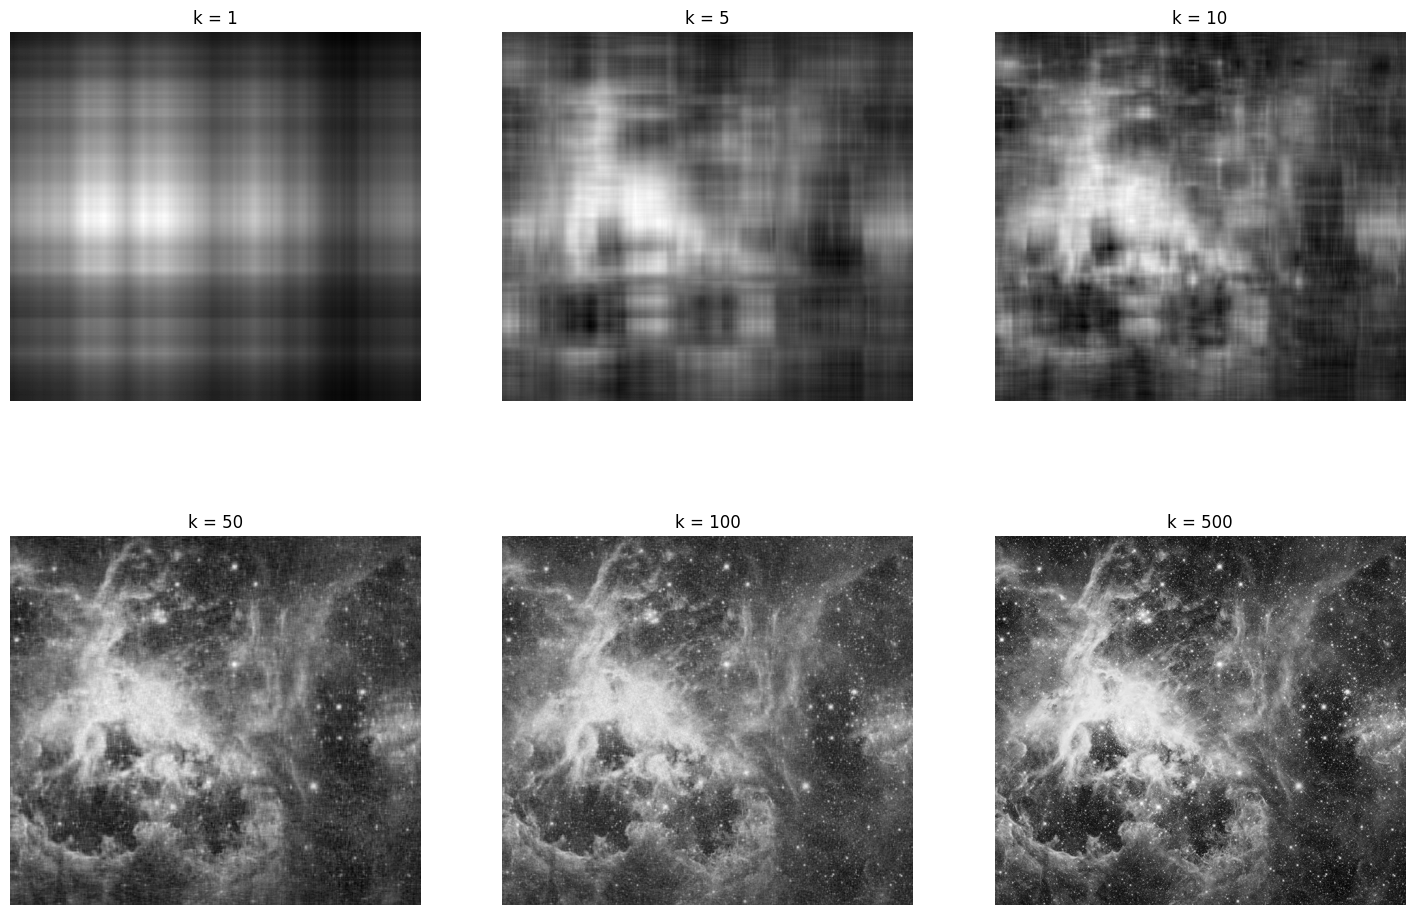

In [77]:
# consider only the first k elements
k_arr = [1, 5, 10, 50, 100, 500]

fig, axs = plt.subplots(2, 3, figsize=(18, 12))
axs = axs.flatten()
plt.set_cmap("gray")

for i in range(len(k_arr)):
    k = k_arr[i]
    # create the best rank k approximation of matrix by multiplying the first k-th colummns of U
    # related to the first k-th singular values (matrix sigma) with the first k-th rows of VT
    Xk = U[:, :k] @ np.diag(s[:k]) @ VT[:k, :]
    axs[i].imshow(Xk)
    axs[i].set_title("k = %d" % k)
    axs[i].set_axis_off()

Visualize the $k$-th rank-1 matix, for $k$ = 1,2,...,6


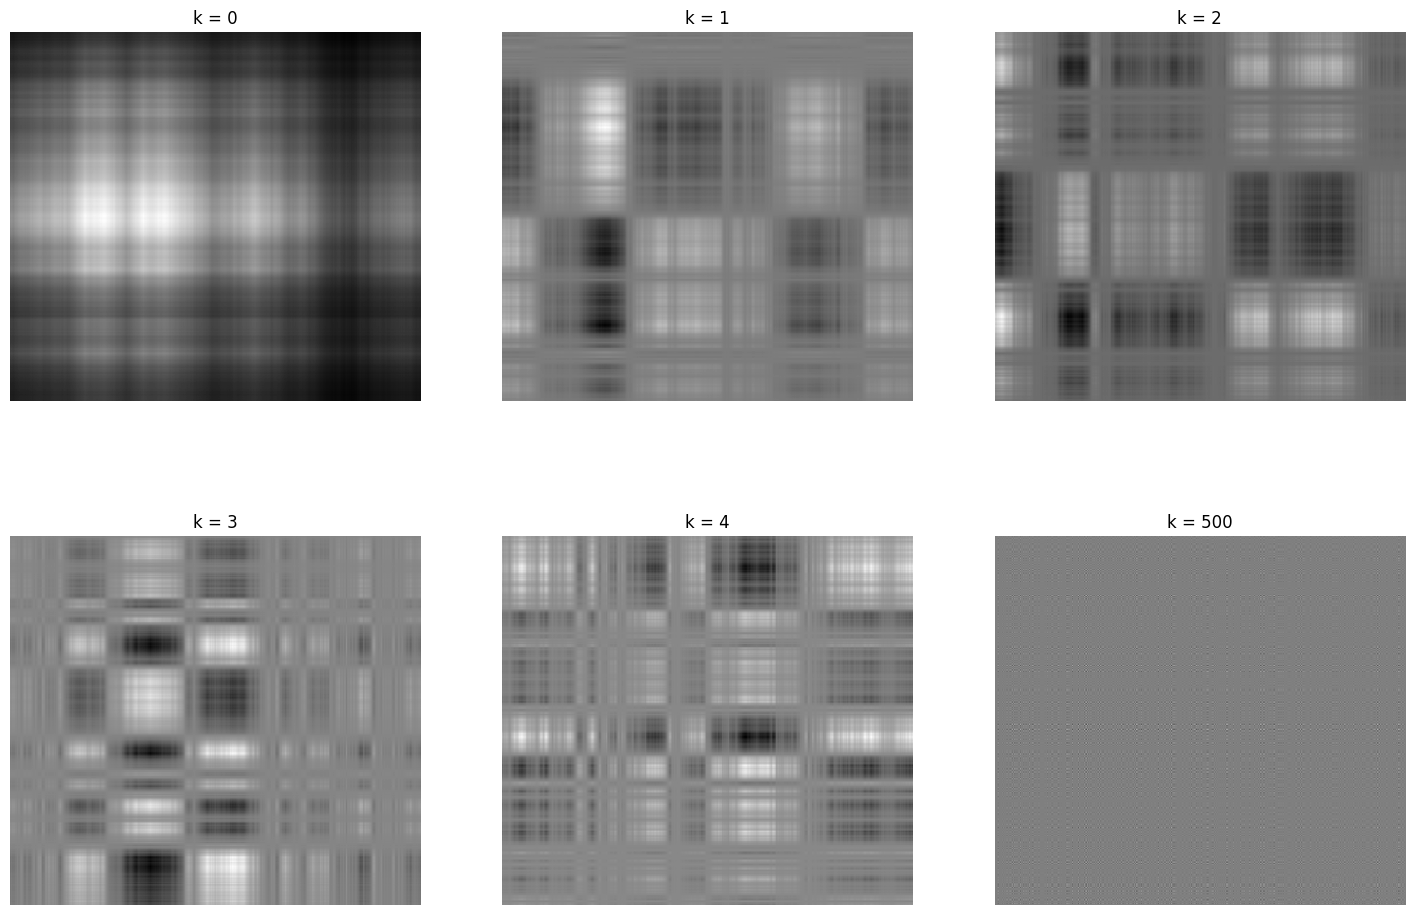

In [78]:
# consider only the first k elements
# k_arr = np.arange(1,7,1)

k_arr = [0, 1, 2, 3, 4, k]

fig, axs = plt.subplots(2, 3, figsize=(18, 12))
axs = axs.flatten()
plt.set_cmap("gray")

for i in range(len(k_arr)):
    k = k_arr[i]
    # outer product between k-th column of U and k-th row of VT (so it's the k-th column of V)
    Xk = np.outer(s[k] * U[:, k], VT[k, :])
    axs[i].imshow(Xk)
    axs[i].set_title("k = %d" % k)
    axs[i].set_axis_off()

## Randomized SVD

Implement now a function that computes the randomized SVD of rank $k$ of a generic matrix $A$.


In [79]:
def randomized_SVD(A, k):
    print("k = ", k)
    m, n = A.shape
    print(f"Shape of matrix A: m = {m}, n = {n}")

    # create a random matrix
    omega = np.random.rand(n, k)
    print(f"shape of matrix Omega: ", omega.shape)
    Y = A @ omega
    print("shape of matrix Y = A @ Omega (should be m * k): ", Y.shape)
    # default mode of qr factorization: reduced --> that's what I'm interested in
    Q, R = np.linalg.qr(Y)
    print("Shape of matrix Q: ", Q.shape)
    B = Q.T @ A
    print("Shape of matrix B: ", B.shape)

    # perform the SVD on B
    rU, rs, rVT = np.linalg.svd(B, full_matrices=False)

    # recover left singular values
    rU = Q @ rU

    print("Shape of matrix rU: ", rU.shape)
    print("Shape of vector rs: ", rs.shape)
    print("Shape of matrix rVT: ", rVT.shape)
    return rU, rs, rVT

Prof. solution


In [80]:
def _randomized_SVD(A, k):
    m, n = A.shape
    # take a random combination of matrix A
    # there's a high probability that the most important features are inside that random combination
    P = np.random.randn(n, k)
    Z = A @ P

    # perform the QR factorization of the random combination of A
    Q, R = np.linalg.qr(Z)
    # Q is an orthonormal basis for the column space of Z

    # then project A onto the basis Q (so onto the column space of Z)
    Y = Q.T @ A

    # perform the SVD of Y
    Uy, sy, VTy = np.linalg.svd(Y, full_matrices=False)

    # since Uy is obtained by projecting A onto the basis Q, we have to bring U back to the basis of A
    U = Q @ Uy
    return U, sy, VTy

Set $k=100$ and compute the randomized SVD of the picture used above.


In [81]:
k = 100
rU, rs, rVT = randomized_SVD(X, k)

k =  100
Shape of matrix A: m = 567, n = 630
shape of matrix Omega:  (630, 100)
shape of matrix Y = A @ Omega (should be m * k):  (567, 100)
Shape of matrix Q:  (567, 100)
Shape of matrix B:  (100, 630)
Shape of matrix rU:  (567, 100)
Shape of vector rs:  (100,)
Shape of matrix rVT:  (100, 630)


Plot the approximate singular values, their cumulate values and their cumulate squares, with a comparison of the ones obtained with the "exact" (i.e. non randomized) SVD.


Text(0.5, 1.0, 'cumulate squares')

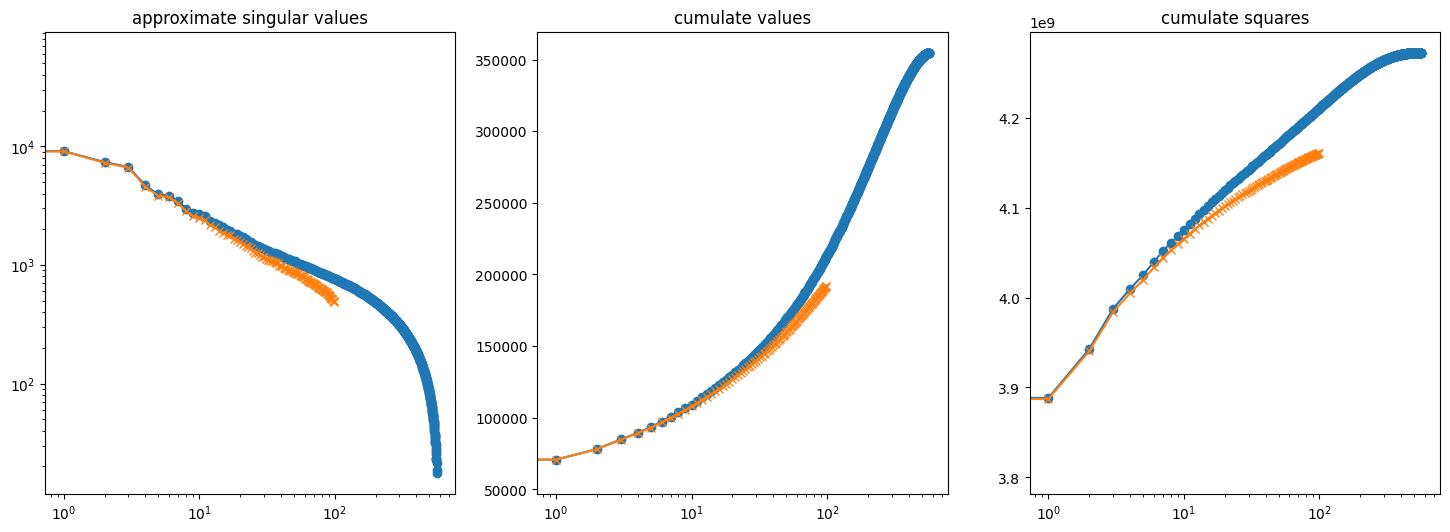

In [82]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
axs[0].loglog(s, "o-")
axs[0].loglog(rs, "x-")
axs[0].set_title("approximate singular values")

axs[1].semilogx(np.cumsum(s), "o-")
axs[1].semilogx(np.cumsum(rs), "x-")
axs[1].set_title("cumulate values")

axs[2].semilogx(np.cumsum(s**2), "o-")
axs[2].semilogx(np.cumsum(rs**2), "x-")
axs[2].set_title("cumulate squares")

Compare the original picture with the best rank-$k$ matrix obtained through SVD and the best rank-$k$ matrix obtained through randomized SVD.


100


Text(0.5, 1.0, 'random svd k-th rank approximation image')

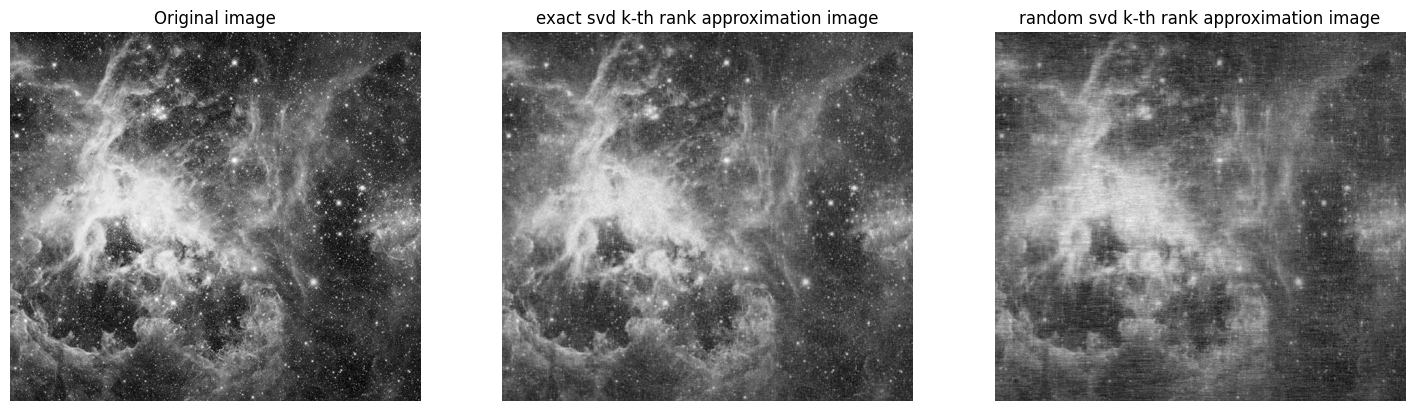

In [83]:
print(k)
Xk = U[:, :k] @ np.diag(s[:k]) @ VT[:k, :]
rXk = rU @ np.diag(rs) @ rVT

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

plt.set_cmap("gray")

axs[0].imshow(X)
axs[0].set_axis_off()
axs[0].set_title("Original image")

axs[1].imshow(Xk)
axs[1].set_axis_off()
axs[1].set_title("exact svd k-th rank approximation image")

axs[2].imshow(rXk)
axs[2].set_axis_off()
axs[2].set_title("random svd k-th rank approximation image")